In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
# raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/RELIANCE.csv')
# raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/HDFC.csv')
# raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/TCS.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/HDFCBANK.csv')

raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/INFY.csv')
# raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/KOTAKBANK.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/ITC.csv')

#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/ICICIBANK.csv')


In [59]:
# rename columns according to our older convention
raw_data.rename(
    {'Datetime':'time',
     'Open': 'open',
    'High': 'high',
    'Low' : 'low',
    'Close':'close',
    'Volume' : 'volume'},
    axis=1,
    inplace=True)

In [60]:
print(raw_data.shape)
raw_data.head()

(6404, 7)


,time,open,high,low,close,volume,Trading_code
0,2021-04-26 09:15:00+05:30,1332.25,1347.85,1321.45,1347.00,1108287,INFY
1,2021-04-26 09:30:00+05:30,1346.50,1351.30,1341.55,1345.60,504701,INFY
2,2021-04-26 09:45:00+05:30,1345.45,1351.00,1343.85,1348.80,315988,INFY
3,2021-04-26 10:00:00+05:30,1348.70,1349.80,1345.60,1346.30,197975,INFY
4,2021-04-26 10:15:00+05:30,1346.40,1348.25,1345.00,1346.35,176582,INFY


In [61]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

In [62]:
# reversing the dataframe 
close_ds_rev = close_ds.loc[::-1, :]
close_ds_rev.head()

,time,close
6403,2022-05-06 15:15:00+05:30,1545.000000
6402,2022-05-06 15:00:00+05:30,1542.800049
6401,2022-05-06 14:45:00+05:30,1541.000000
6400,2022-05-06 14:30:00+05:30,1538.449951
6399,2022-05-06 14:15:00+05:30,1540.250000


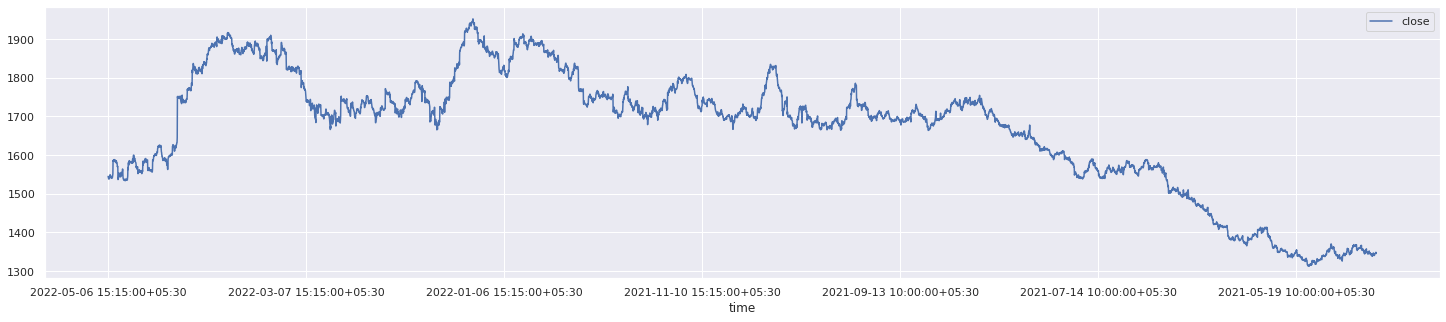

In [63]:
close_ds_rev.plot(x='time', y='close', figsize=(25, 5))

In [64]:
# converting time serires into a supervised learning problem
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [65]:
# n_in ---> number of previous data points (lag observations) to consider as input
# n_out --> number of datapoints to predict
# dataset ----> dataframe with (n_in + n_out + 1 [for current timestamp]) numbers of columns used for supervised training of the model 

n_in = 50
n_out = 1
dataset = series_to_supervised(close_ds_rev.drop('time', axis=1), n_in, n_out)
print(dataset.shape)
dataset.head()

(6353, 52)


,close(t-50),close(t-49),close(t-48),close(t-47),close(t-46),close(t-45),close(t-44),close(t-43),close(t-42),close(t-41),...,close(t-8),close(t-7),close(t-6),close(t-5),close(t-4),close(t-3),close(t-2),close(t-1),close(t),close(t+1)
6353,1545.000000,1542.800049,1541.000000,1538.449951,1540.250000,1538.949951,1541.250000,1539.500000,1545.849976,1545.449951,...,1584.199951,1580.300049,1580.000000,1580.000000,1574.699951,1569.599976,1571.099976,1568.050049,1536.699951,1537.400024
6352,1542.800049,1541.000000,1538.449951,1540.250000,1538.949951,1541.250000,1539.500000,1545.849976,1545.449951,1549.150024,...,1580.300049,1580.000000,1580.000000,1574.699951,1569.599976,1571.099976,1568.050049,1536.699951,1537.400024,1542.099976
6351,1541.000000,1538.449951,1540.250000,1538.949951,1541.250000,1539.500000,1545.849976,1545.449951,1549.150024,1547.000000,...,1580.000000,1580.000000,1574.699951,1569.599976,1571.099976,1568.050049,1536.699951,1537.400024,1542.099976,1542.000000
6350,1538.449951,1540.250000,1538.949951,1541.250000,1539.500000,1545.849976,1545.449951,1549.150024,1547.000000,1542.900024,...,1580.000000,1574.699951,1569.599976,1571.099976,1568.050049,1536.699951,1537.400024,1542.099976,1542.000000,1554.099976
6349,1540.250000,1538.949951,1541.250000,1539.500000,1545.849976,1545.449951,1549.150024,1547.000000,1542.900024,1545.300049,...,1574.699951,1569.599976,1571.099976,1568.050049,1536.699951,1537.400024,1542.099976,1542.000000,1554.099976,1548.150024


In [66]:
# train test split

from sklearn.model_selection import train_test_split
target = dataset.loc[:, ['close(t+1)']]
features = dataset.drop('close(t+1)', axis=1)
print(target.shape)
print(features.shape)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# type(X_train.values)

(6353, 1)
(6353, 51)
(4447, 51)
(4447, 1)
(1906, 51)
(1906, 1)


In [67]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
subsequences = 3
timesteps = X_train_series.shape[1]//subsequences
X_train_series_sub = X_train_series.reshape((X_train_series.shape[0], subsequences, timesteps, 1))
X_test_series_sub = X_test_series.reshape((X_test_series.shape[0], subsequences, timesteps, 1))
print('Train set shape', X_train_series_sub.shape)
print('Validation set shape', X_test_series_sub.shape)

Train set shape (4447, 3, 17, 1)
Validation set shape (1906, 3, 17, 1)


In [68]:
# Model training

from tensorflow import keras 
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

# CNN LSTM

model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=3)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.0003))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [69]:
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, y_train.values, validation_data=(X_test_series_sub, y_test.values), epochs=60, verbose=2)

Epoch 1/60
139/139 - 4s - loss: 1074345.5000 - val_loss: 30030.5098 - 4s/epoch - 28ms/step
Epoch 2/60
139/139 - 1s - loss: 1687.9866 - val_loss: 277.3362 - 945ms/epoch - 7ms/step
Epoch 3/60
139/139 - 1s - loss: 285.8933 - val_loss: 276.3307 - 925ms/epoch - 7ms/step
Epoch 4/60
139/139 - 1s - loss: 285.1878 - val_loss: 277.2990 - 932ms/epoch - 7ms/step
Epoch 5/60
139/139 - 1s - loss: 285.3762 - val_loss: 275.3841 - 915ms/epoch - 7ms/step
Epoch 6/60
139/139 - 1s - loss: 285.4476 - val_loss: 278.3628 - 915ms/epoch - 7ms/step
Epoch 7/60
139/139 - 1s - loss: 285.7029 - val_loss: 275.1143 - 916ms/epoch - 7ms/step
Epoch 8/60
139/139 - 1s - loss: 285.4911 - val_loss: 275.1612 - 955ms/epoch - 7ms/step
Epoch 9/60
139/139 - 1s - loss: 285.0719 - val_loss: 279.8813 - 929ms/epoch - 7ms/step
Epoch 10/60
139/139 - 1s - loss: 285.6295 - val_loss: 274.9573 - 948ms/epoch - 7ms/step
Epoch 11/60
139/139 - 1s - loss: 285.7468 - val_loss: 276.9529 - 922ms/epoch - 7ms/step
Epoch 12/60
139/139 - 1s - loss: 286

Text(0, 0.5, 'MSE')

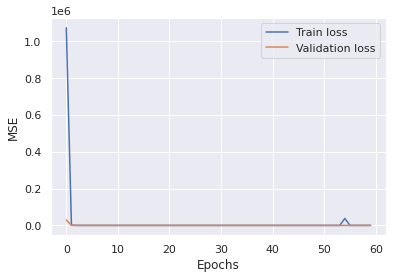

In [70]:
# plots 
fig = plt.figure()
plt.plot(cnn_lstm_history.history['loss'], label='Train loss')
plt.plot(cnn_lstm_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [71]:
# RMSE calculation
from sklearn.metrics import mean_squared_error
cnn_lstm_train_pred = model_cnn_lstm.predict(X_train_series_sub)
cnn_lstm_test_pred = model_cnn_lstm.predict(X_test_series_sub)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, cnn_lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_test, cnn_lstm_test_pred)))

Train rmse: 16.775274539280783
Validation rmse: 16.49434776795616


In [72]:
print(y_test[0:10])
print(cnn_lstm_test_pred[0:10])

      close(t+1)
3136     1699.25
154      1344.20
1063     1543.30
1840     1654.40
5792     1910.45
3987     1726.05
6257     1565.35
2780     1684.40
834      1445.00
2185     1698.60
[[1703.4415]
 [1339.4653]
 [1559.6343]
 [1665.4832]
 [1903.3342]
 [1749.2468]
 [1579.3572]
 [1676.9681]
 [1452.236 ]
 [1693.6719]]


In [73]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
# plt.figure(figsize=(6, 4))
# plt.ylabel('Closing Price', fontweight='bold') 
# plt.xlabel('Number of instances', fontweight='bold') 
# plt.title("Tesla", fontweight='bold')

# plt.plot(pd.Series(y_test), color='red')
# plt.plot(pd.Series(cnn_lstm_test_pred.flatten()), color='blue')
# plt.legend(['Actual','Predicted'])

In [74]:
from sklearn.metrics import mean_absolute_error
print('Train MAE for vanilla:', mean_absolute_error(y_train, cnn_lstm_train_pred))
print('Test MAE for vanilla:', mean_absolute_error(y_test, cnn_lstm_test_pred))

Train MAE for vanilla: 12.373174451789831
Test MAE for vanilla: 12.321498093499967


In [75]:
# MAPE calculation
from sklearn.metrics import mean_absolute_percentage_error
print('Train MAPE:', mean_absolute_percentage_error(y_train, cnn_lstm_train_pred))
print('Test MAPE:', mean_absolute_percentage_error(y_test, cnn_lstm_test_pred))

Train MAPE: 0.007309352946684298
Test MAPE: 0.0072853648936202385
